In [ ]:
import kagglehub
clmentbisaillon_fake_and_real_news_dataset_path = kagglehub.dataset_download('clmentbisaillon/fake-and-real-news-dataset')
print('Data source import complete.')

Data source import complete.


In [ ]:
import pandas as pd

# Load the  Data

In [ ]:
Fake=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
true=pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

- Give the fake news label 0 :

In [ ]:
Fake['label']=0

In [ ]:
Fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


- Give the true news label 1 :

In [ ]:
true['label']=1

In [ ]:
true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


- Delete unneeded columns

In [ ]:
Fake.drop(columns=["title","date","subject"],inplace=True)
true.drop(columns=["title","date","subject"],inplace=True)

In [ ]:
Fake.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [ ]:
true.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


- Add the two data frame in one datarame

In [ ]:
News=pd.concat([Fake,true],ignore_index=True)
News

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


- Check for cleaning data

In [ ]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [ ]:
News.isnull().sum()

,0
text,0
label,0


In [ ]:
News.duplicated().sum()

np.int64(6251)

In [ ]:
News.drop_duplicates(inplace=True)
News.duplicated().sum()

np.int64(0)

# Preprocessing the text n the data:

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora
nltk.data.path.append("/kaggle/working/nltk_data/")

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...


Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/README  
  inflating: /kaggle/w

- this function for cleaning the text in the dataframe from any strange character and abstract all words to the original and return the unique words in each sentence:

In [ ]:
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text
    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]
    Words = [word for word in Words if len(word) > 3]
    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()
    return cleaned_text

In [ ]:
x=News.drop('label',axis=1)
y=News.label

- make the column of the text in dataframe to list:

In [ ]:
texts=list(x['text'])

- call the function to cleaning the texts in this list:

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np

# Download necessary NLTK data to the specified directory
nltk_data_path = "/kaggle/working/nltk_data/"
nltk.data.path.append(nltk_data_path) # Add the custom path if not already added

# Download the missing 'punkt_tab' resource
nltk.download('punkt_tab', nltk_data_path)
nltk.download('wordnet', nltk_data_path)
nltk.download('omw-1.4', nltk_data_path)
# Download the stopwords resource
nltk.download('stopwords', nltk_data_path)


# The process_text function remains the same
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]
    Words = [word for word in Words if len(word) > 3]
    indices = np.unique(Words, return_index=True)[1]
    cleaned_text_list = np.array(Words)[np.sort(indices)].tolist()
    return cleaned_text_list
cleaned_text = [process_text(text) for text in texts]

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split

# Download necessary NLTK data to the specified directory
nltk_data_path = "/kaggle/working/nltk_data/"
nltk.data.path.append(nltk_data_path) # Add the custom path if not already added

# Download the missing 'punkt_tab' resource
nltk.download('punkt_tab', nltk_data_path)
nltk.download('wordnet', nltk_data_path)
nltk.download('omw-1.4', nltk_data_path)
# Download the stopwords resource
nltk.download('stopwords', nltk_data_path)

# The process_text function remains the same
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text_list = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text_list
x = News.drop('label', axis=1)
y = News.label

# Split the data into training and testing sets
# You can adjust the test_size and random_state as needed
X_train, X_test, y_train, y_test = train_test_split(x['text'], y, test_size=0.2, random_state=42)

print("Data split complete.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Process the training and testing texts
# texts = list(x['text']) # This was processing the whole dataset, now we process split data
X_train_cleaned = [process_text(text) for text in X_train]
X_test_cleaned = [process_text(text) for text in X_test]

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Package stopwords is already up-to-date!


Data split complete.
X_train shape: (30917,)
X_test shape: (7730,)
y_train shape: (30917,)
y_test shape: (7730,)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Use the cleaned training and testing texts for tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_cleaned) # Fit on the cleaned training data
word_idx = tokenizer.word_index
v = len(word_idx)
print("the size of vocab =", v)
X_train_sequences = tokenizer.texts_to_sequences(X_train_cleaned) # Convert cleaned training texts to sequences
X_test_sequences = tokenizer.texts_to_sequences(X_test_cleaned) # Convert cleaned testing texts to sequences

# Now X_train_sequences and X_test_sequences contain the sequences

the size of vocab = 91536


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 150
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen)

# Now X_train_padded and X_test_padded contain the padded sequences

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 150
# Use the tokenized and sequenced data for padding
X_train = pad_sequences(X_train_sequences, maxlen=maxlen)
X_test = pad_sequences(X_test_sequences, maxlen=maxlen)

In [ ]:
y.value_counts()

,count
label,
1,21192
0,17455


- build the model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,GlobalMaxPooling1D,Dropout
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
from tensorflow.keras.optimizers import Adam

In [ ]:
inputt=Input(shape=(maxlen,))
learning_rate = 0.0001
x=Embedding(v+1,100)(inputt)
x = Dropout(0.5)(x)
x = LSTM(150,return_sequences=True)(x)
x = Dropout(0.5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputt, x)
# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

transform it to be categorical

In [ ]:
import tensorflow as tf
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

# Train the model:

In [ ]:

history = model.fit(X_train, y_train_one_hot, epochs=15, validation_data=(X_test, y_test_one_hot))

Epoch 1/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 417s 428ms/step - accuracy: 0.6601 - loss: 0.5529 - val_accuracy: 0.9670 - val_loss: 0.1176
Epoch 2/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 439s 425ms/step - accuracy: 0.9761 - loss: 0.0810 - val_accuracy: 0.9765 - val_loss: 0.1064
Epoch 3/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 417s 431ms/step - accuracy: 0.9888 - loss: 0.0418 - val_accuracy: 0.9783 - val_loss: 0.0736
Epoch 4/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 437s 427ms/step - accuracy: 0.9945 - loss: 0.0227 - val_accuracy: 0.9783 - val_loss: 0.0814
Epoch 5/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 428s 412ms/step - accuracy: 0.9950 - loss: 0.0194 - val_accuracy: 0.9806 - val_loss: 0.0599
Epoch 6/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 457s 428ms/step - accuracy: 0.9971 - loss: 0.0102 - val_accuracy: 0.9794 - val_loss: 0.0594
Epoch 7/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 415s 429ms/step - accuracy: 0.9980 - loss: 0.0080 - val_accuracy: 0.9797 - val_loss: 0.0595
Epoch 8/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 391s 404ms/step - accuracy: 0.9984 -

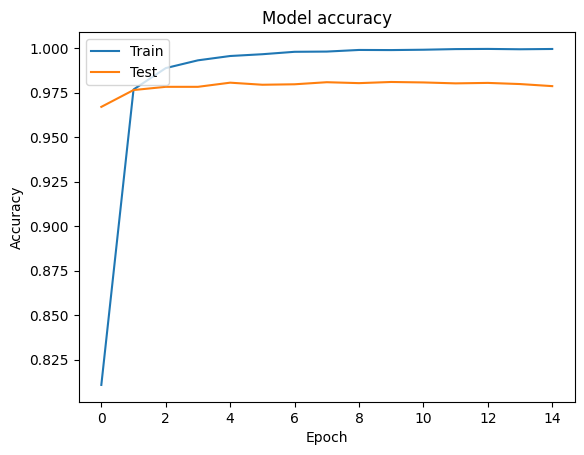

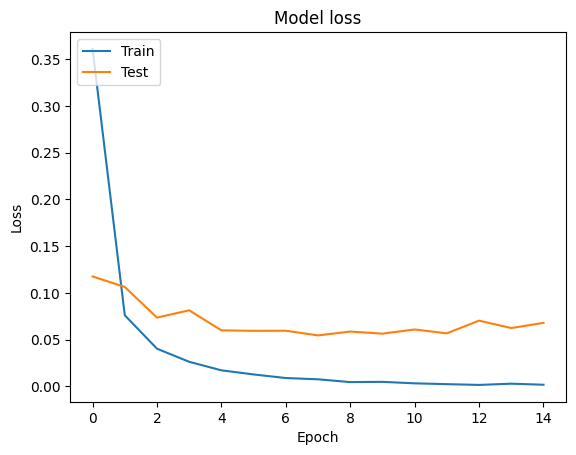

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Accuracy:

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

242/242 ━━━━━━━━━━━━━━━━━━━━ 42s 173ms/step - accuracy: 0.9813 - loss: 0.0620
Test Loss: 0.06793786585330963
Test Accuracy: 0.9786545634269714


242/242 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step


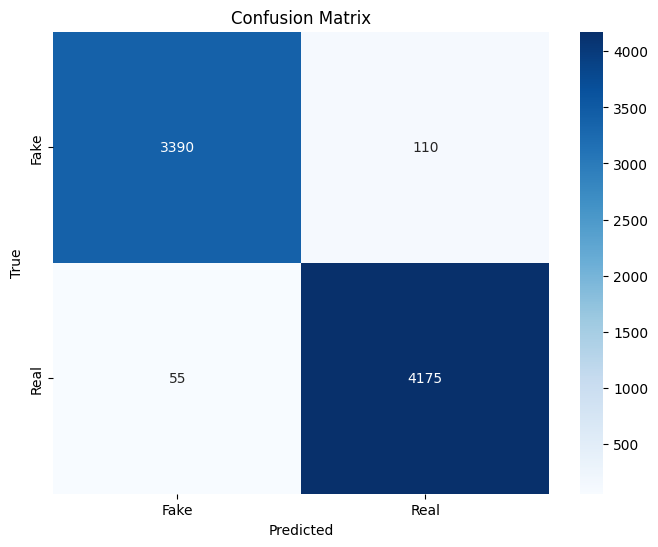

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
inverse_word_index = {v: k for k, v in tokenizer.word_index.items()}

def decode_sequence(seq):
    return ' '.join(inverse_word_index.get(i, '?') for i in seq if i != 0)
def showFakeReal(max_len):
    print("=== Test news predicted as REAL (decoded) ===\n")
    count = 0
    for seq, pred_label in zip(X_test, y_pred_labels):
        if pred_label == 1:
            print(decode_sequence(seq))
            print('---')
            count += 1
        if count >= max_len:
            break
    print("\n=== Test news predicted as FAKE (decoded) ===\n")
    count = 0
    for seq, pred_label in zip(X_test, y_pred_labels):
        if pred_label == 0:
            print(decode_sequence(seq))
            print('---')
            count += 1
        if count >= max_len:
            break

In [ ]:
def check_news(custom_news):
    # Convert text to sequence using the trained tokenizer
    custom_seq = tokenizer.texts_to_sequences(custom_news)

    # Pad the sequence to the same max length used during training
    max_length = X_train.shape[1]  # or the max length used in training
    custom_pad = pad_sequences(custom_seq, maxlen=max_length)

    # Predict class probabilities
    custom_pred = model.predict(custom_pad)

    # Get predicted class index
    predicted_class = np.argmax(custom_pred, axis=1)[0]

    # Decode prediction label
    predicted = label_encoder.inverse_transform([predicted_class])[0]
    labels = ['FAKE', 'REAL']
    predicted_label = labels[predicted]

    print(f"Custom news prediction: {predicted_label}\n")

fakeNews1 = '''pennsylvania apparently failed basic biology strong donald trump supporter carl unger montgomery wrote letter williamsport gazette supportive protesting called sexist make stupid attack hillary clinton liberal obama calling social justice code socialism begin college student talking triggered taking away freedom speech politician work defend government come hate break everywhere military police wanted would take want call critical health expect apologize apparent federal offense getting pneumonia read next sentence paragraph twice totally believe especially zinger woman sick time month still business choice though year probably since last millennium likely lived white house period well complete case argument convinced also made racist silence handle truth give money people race lazy full actually real newspaper today twitter anna october featured image justin sullivan getty'''
fakeNews2 = '''CUPERTINO, CA—Amidst the strain of tariffs, Apple CEO Tim Cook announced Thursday the launch of a new 7,083-piece iPhone kit. “Apple customers will have a blast soldering, polishing, and drilling as they build their very own iPhone,” Cook said in a Keynote presentation at Apple headquarters, touting the new product as an innovative, first-of-its-kind achievement and noting that the tech giant’s competitors were already scrambling to offer similar build-your-own products of their own. “Based on your level of manufacturing experience, it should take anywhere between one and four days to assemble, not counting any bathroom or sleep breaks. It’s the perfect family activity. Kids love it! It even comes with a free rock you can use to mine your own lithium.” At press time, Cook confirmed the kit was exclusively available to U.S. customers'''
fakeNews3 = '''Breakthrough in Battery Technology Could Double Electric Vehicle Range by 2027 San Francisco, May 2025 — Researchers at the Silicon Valley startup VoltCore have announced a major breakthrough in solid-state battery technology that could potentially double the driving range of electric vehicles within the next two years. According to their published white paper, the new battery design uses a novel ceramic electrolyte that significantly improves energy density while reducing charging times by up to 60%. Industry experts say this advancement could accelerate EV adoption globally and reshape the automotive market. VoltCore plans to partner with leading car manufacturers to begin mass production by late 2026.'''

realNews1 = '''interview search expanded database identity document longer application form current system require others government already extensive believe need suspends waiver program allows consular officer exempt applicant face seeking renew within year expiration immigration attorney change make even routine much complicated consuming mean assistance attempt wait unduly affected hiring fellow work embassy abroad admission four month study additional check necessary although case also implemented blanket syrian sufficient made without detail suspension lifted give priority suffering religious based prosecution minority television move protect christian ethnic like yazidis middle east potentially open door legal challenge claiming discrimination expert resume fewer allowed compared designated barack obama city objected resettlement seek local jurisdiction role deciding whether allow live completing biometric exit tracking arrival departure using finger print former start implementing largest airport properly cover land port major undertaking according report bipartisan policy center expensive implement offer mixed value enforcement objective version story refiled spelling paragraph'''
realNews2 = '''US President Donald Trump has accused China of violating a two-week-old truce on tariffs - a sign trade tensions between the world\'s two largest economies could again escalate.  Washington and Beijing agreed to temporarily lower tit-for-tat tariffs after talks in Geneva earlier this month.  Trump said on Friday in a Truth Social post that tariffs had left China in "grave economic danger", before the countries had made a "fast deal".  However he said China had "totally violated its agreement with us", without explaining how.  US Trade Representative Jamieson Greer later said China had not been removing non-tariff barriers in the way that had been agreed. Beijing is yet to respond to the claims.'''

print("FN1")
check_news([fakeNews1])

print("FN2")
check_news([fakeNews2])

print("FN3")
check_news([fakeNews3])

print("RN1")
check_news([realNews1])

print("RN2")
check_news([realNews2])


FN1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Custom news prediction: FAKE

FN2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Custom news prediction: FAKE

FN3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Custom news prediction: FAKE

RN1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Custom news prediction: REAL

RN2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Custom news prediction: REAL

